<a href="https://www.kaggle.com/code/m26102002/bank-marketing-campaign-python-statistics?scriptVersionId=260981845" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Marketing Campaign Analysis (Python + Statistics)
**Author:** Avnish Thakur  
**Dataset:** Bank Marketing Campaign Dataset ([Kaggle](https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset/data))

## 1. Business Problem
Banks invest in marketing campaigns to attract customers.  
However, not all campaigns succeed — calls are costly and only some customers subscribe to term deposits.  

**Goal:**  
- Analyze current customer and campaign data.  
- Identify key factors driving campaign success.  
- Build a logistic regression model to predict response (yes/no).  
- Provide actionable strategies to improve future campaign efficiency.  

# 2. Data Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load dataset

df = pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# basic info

df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
(11162, 17)


In [4]:
print(df.describe())
print(df.describe(include='object'))

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


# 3. Data Cleaning

In [5]:
# check for null/unknown values

df.isnull().sum()
df.apply(lambda x: (x=='unknown').sum())

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

In [6]:
# replace unknown with nan

df = df.replace('unknown', np.nan)

 > unknown one are the customers who are not previously contacted or they are new customers.

# 4. Exploratory Data Analysis

**Bivariate (Feature vs Target)**


Subscription Rate by job:
deposit               no        yes
job                                
admin.         52.698651  47.301349
blue-collar    63.580247  36.419753
entrepreneur   62.500000  37.500000
housemaid      60.218978  39.781022
management     49.298519  50.701481
retired        33.676093  66.323907
self-employed  53.827160  46.172840
services       60.021668  39.978332
student        25.277778  74.722222
technician     53.922106  46.077894
unemployed     43.417367  56.582633


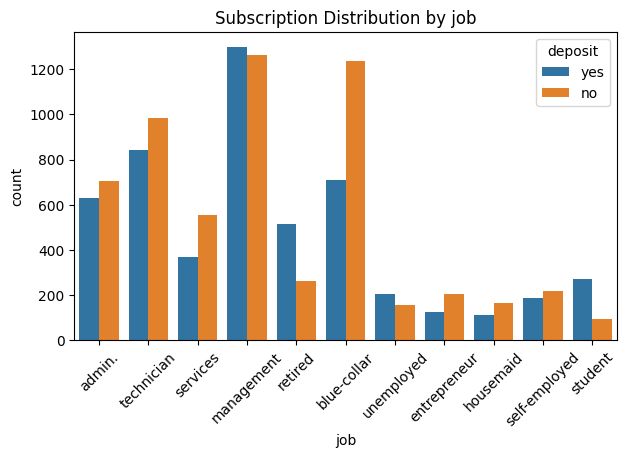


Subscription Rate by marital:
deposit          no        yes
marital                       
divorced  51.894818  48.105182
married   56.621005  43.378995
single    45.650938  54.349062


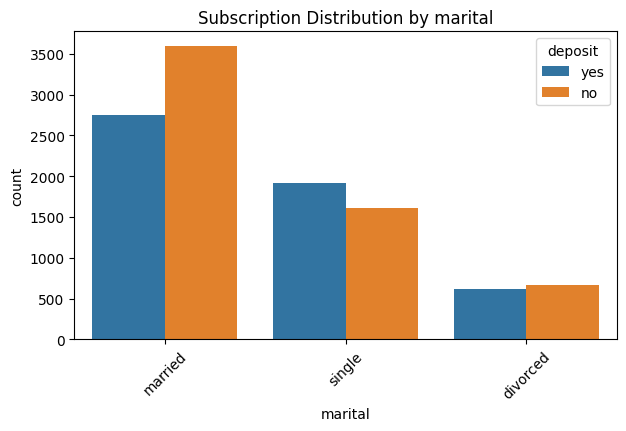


Subscription Rate by education:
deposit           no        yes
education                      
primary    60.600000  39.400000
secondary  55.259313  44.740687
tertiary   45.893196  54.106804


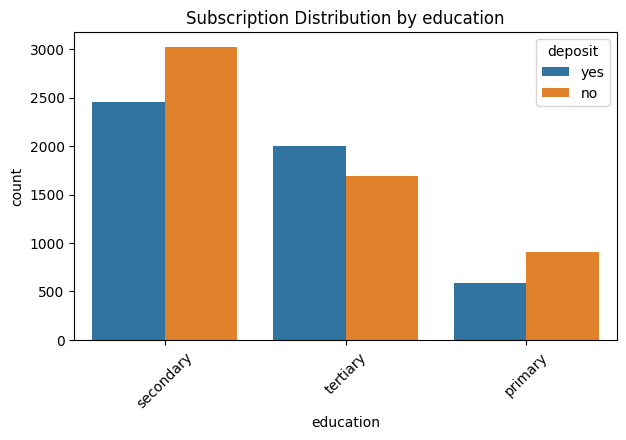


Subscription Rate by default:
deposit         no        yes
default                      
no       52.364926  47.635074
yes      69.047619  30.952381


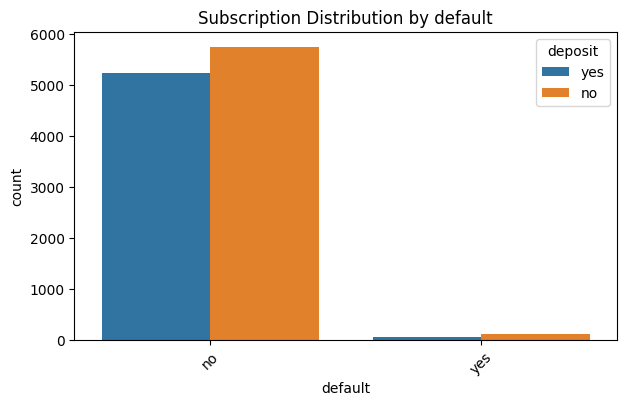


Subscription Rate by housing:
deposit         no        yes
housing                      
no       42.968883  57.031117
yes      63.359212  36.640788


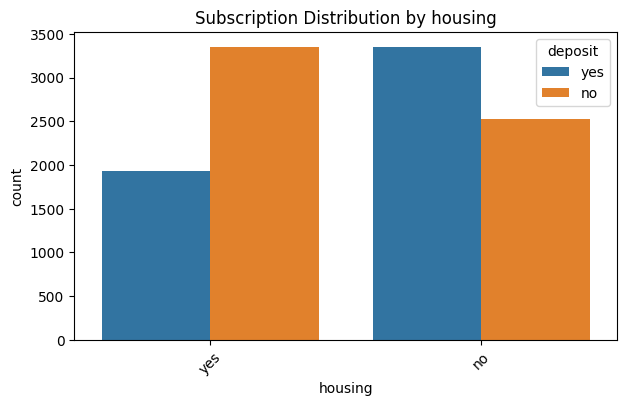


Subscription Rate by loan:
deposit         no        yes
loan                         
no       50.474129  49.525871
yes      66.849315  33.150685


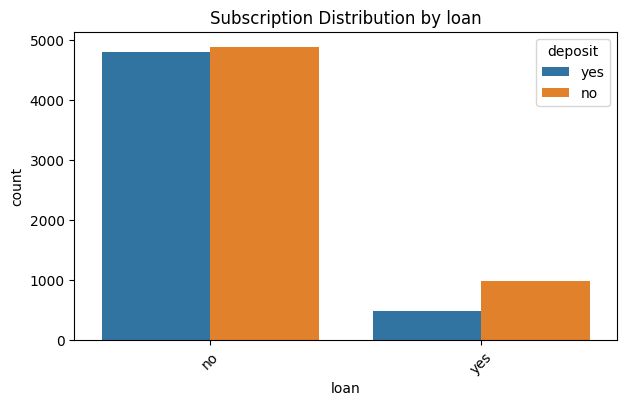


Subscription Rate by contact:
deposit           no        yes
contact                        
cellular   45.672718  54.327282
telephone  49.612403  50.387597


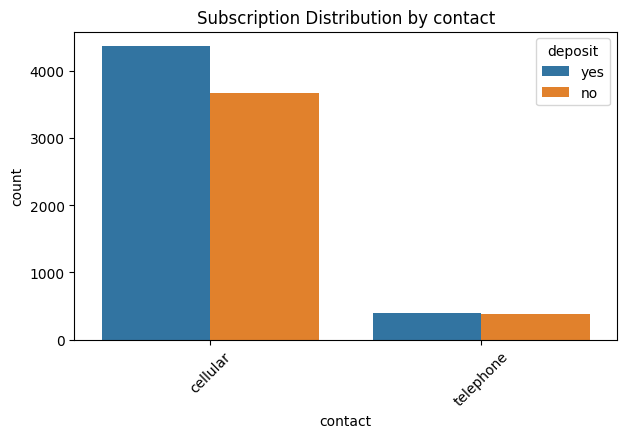


Subscription Rate by month:
deposit         no        yes
month                        
apr      37.486457  62.513543
aug      54.707044  45.292956
dec       9.090909  90.909091
feb      43.170103  56.829897
jan      58.720930  41.279070
jul      58.586526  41.413474
jun      55.319149  44.680851
mar      10.144928  89.855072
may      67.245042  32.754958
nov      57.264051  42.735949
oct      17.602041  82.397959
sep      15.673981  84.326019


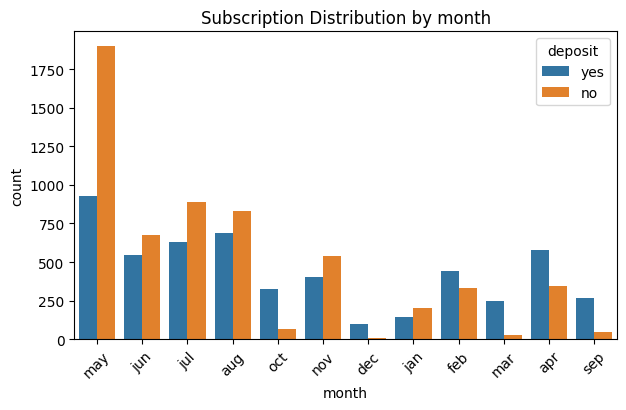


Subscription Rate by poutcome:
deposit          no        yes
poutcome                      
failure   49.674267  50.325733
other     42.830540  57.169460
success    8.683473  91.316527


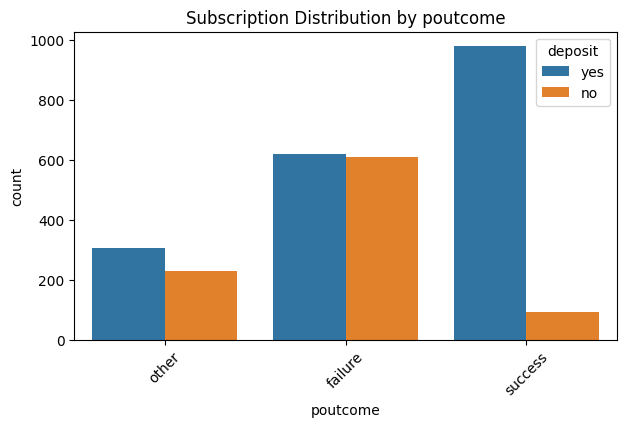

In [7]:
def subscription_rate_by_feature(feature):
    # Crosstab for subscription rates (%)
    rate_table = pd.crosstab(df[feature], df['deposit'], normalize='index') * 100
    print(f"\nSubscription Rate by {feature}:")
    print(rate_table)

    plt.figure(figsize=(7,4))
    sns.countplot(x=feature, hue='deposit', data=df)
    plt.title(f"Subscription Distribution by {feature}")
    plt.xticks(rotation=45)
    plt.show()

campaign_features = [
    'job','marital','education','default','housing','loan',
    'contact','month','poutcome'
]

for feature in campaign_features:
    subscription_rate_by_feature(feature)


In [8]:
## 1. Months - 
# Most contacts happen in may, but success rate is very low.
# March, September, December → smaller campaigns, but higher subscription rates.


## 2. Contact type -
# cellular contacts convert much higher than telephone.


## 3. Previous Campaign Outcome (poutcome) -
# Customers with “success” in past campaigns have much higher chance to subscribe again.
#“Failure” → very low conversion.
#“Unknown” → average.


## 4. Housing Loan - 
# Customers with housing loans tend to subscribe less.


## 5.Job
# Students, Retired → surprisingly high subscription rates.
# Blue-collar, Services → lower subscription rates.


## 6. Education
# Higher education → slightly better conversion rates.
# Secondary education = most volume, but moderate success.


## 7. Marital
# Single clients subscribe more than married/divorced.

# 5. Statistical Test (Analysis)

In [9]:
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
df['response_flag'] = df['deposit'].map({'yes':1, 'no':0})

In [10]:
def feature_stat_test(df, feature, target):
    if df[feature].dtype == 'object':
        # chi-sqaure
        contingency = pd.crosstab(df[feature],df[target])
        chi2, p, dof, ex = chi2_contingency(contingency)
        print(f"chi-square test: {feature} vs {target}, p-value = {p:.5f}")
    else:
        # t-test
        group1 = df[df[target] == 1][feature]
        group0 = df[df[target] == 0][feature]
        t, p = ttest_ind(group1, group0)
        print(f"T-test: {feature} vs {target}, p-value = {p:.5f}")

features = ['age','job','marital','education','default','balance',
            'housing','loan','contact','day','month','duration',
            'campaign','previous','poutcome']
for f in features:
    feature_stat_test(df, f, 'response_flag')

T-test: age vs response_flag, p-value = 0.00023
chi-square test: job vs response_flag, p-value = 0.00000
chi-square test: marital vs response_flag, p-value = 0.00000
chi-square test: education vs response_flag, p-value = 0.00000
chi-square test: default vs response_flag, p-value = 0.00002
T-test: balance vs response_flag, p-value = 0.00000
chi-square test: housing vs response_flag, p-value = 0.00000
chi-square test: loan vs response_flag, p-value = 0.00000
chi-square test: contact vs response_flag, p-value = 0.03915
T-test: day vs response_flag, p-value = 0.00000
chi-square test: month vs response_flag, p-value = 0.00000
T-test: duration vs response_flag, p-value = 0.00000
T-test: campaign vs response_flag, p-value = 0.00000
T-test: previous vs response_flag, p-value = 0.00000
chi-square test: poutcome vs response_flag, p-value = 0.00000


In [11]:
# Demographics: Job, age, marital, education → certain groups subscribe more.

# Financials: High balance, no default, stable loans → higher likelihood.

# Campaign history: Previous success (poutcome) → strong predictor.

# Campaign strategy: Optimize number/timing of calls, prefer July–Nov.

# Channel: Cellular slightly better than telephone.

# Duration: Indicates engagement, use only for post-campaign analysis.

# 6. Encoding Categorical Features

In [12]:
from sklearn.preprocessing import LabelEncoder

categorical_features = [
    'job','marital','education','default','housing','loan',
    'month','poutcome'
]
le = LabelEncoder()

for col in categorical_features:
    df[col] = le.fit_transform(df[col])

# 7. Split Dataset

In [13]:
X = df.drop(columns = ['response_flag','deposit','contact', 'duration'])
y = df.response_flag

In [14]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model

In [15]:
# train model

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [16]:
# Predictions

y_pred = model.predict(X_test_scaled)

In [17]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.656


> moderate performance 

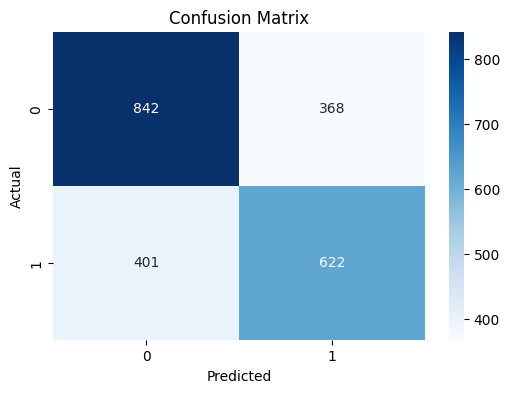

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69      1210
           1       0.63      0.61      0.62      1023

    accuracy                           0.66      2233
   macro avg       0.65      0.65      0.65      2233
weighted avg       0.65      0.66      0.66      2233



In [20]:
# Accuracy: ~0.64

# Reason: Data imbalance (only ~11% subscribed).

# Better Metrics: Precision, Recall, ROC-AUC used for evaluation.

# Business Value: Even with modest accuracy, the model identifies which features impact success, guiding resource allocation.

> (Business Strategy)

Prioritize quality over quantity → Avoid calling the same customer too many times.

Focus on the right channels → Use cellular over telephone.

Target segments → Educated professionals, mid-age customers, and those with stable jobs show higher response.

Optimize call duration → Train agents for meaningful, longer conversations rather than rushed calls.

Re-engagement strategy → Don’t retry too soon; wait longer before calling the same customer again.